# ITS307 Data Analytics : Autumn Semester 2022
# Practical 10 

# Evaluation metrics

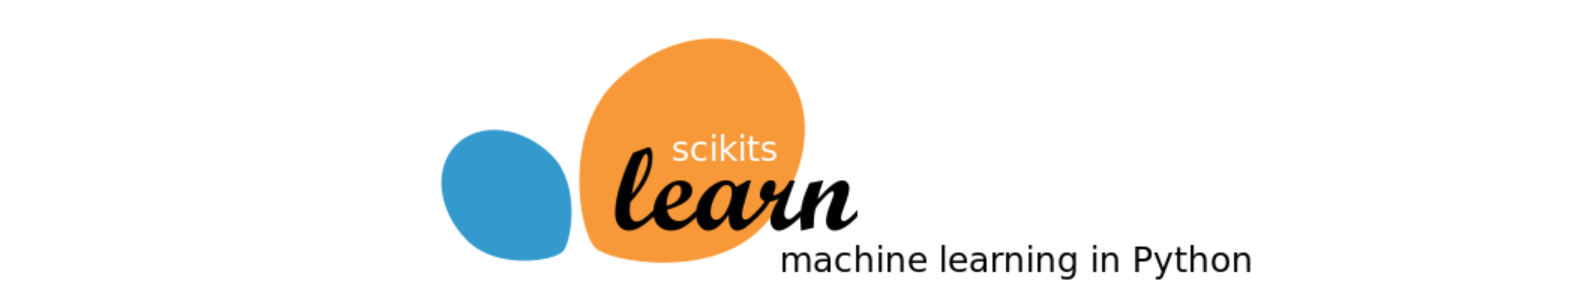

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> Handling Missing values</li>

<li> Scaling Numerical Features  </li>
<li> Encode Categorical Features  </li>
<li> Training Model</li>
<li> Evaluating Model</li>
<li> Making Prediction</li>
</ol>

# 0. Learning Objectives

For this test, we will use the Credit Card Approval dataset from the UCI Machine Learning Repository. Dataset has mixture of both numerical and categorical features with number of missing entries. The features of this dataset have been anonymized to protect the privacy, but some blog gives pretty good overview of the probable features. The probable features in a typical credit card application are `Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income` and finally the `ApprovalStatus`. For your understanding map the features descriptions given here with respect to columns in the dataset.

Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
  #### By the end of this lab, you should be able to predict whether an applicant will be getting credit card approval or not.

# 1. Importing Libraries 

Import all the necessary libraries here. If you don't remember all the libraries in this step, you may choose to import when required.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Loading and Cleaning Data with Pandas


##  2.1.  Load data
- To load data, mention feature names given above in section 1 and display first five and last five records.

In [2]:

df = pd.read_csv('creditcard.txt')
df.head()



b  30.83      0  u  g  w  v  1.25  t t.1  01  f g.1  00202  0.1  +
0  a  58.67  4.460  u  g  q  h  3.04  t   t   6  f   g  00043  560  +
1  a  24.50  0.500  u  g  q  h  1.50  t   f   0  f   g  00280  824  +
2  b  27.83  1.540  u  g  w  v  3.75  t   t   5  t   g  00100    3  +
3  b  20.17  5.625  u  g  w  v  1.71  t   f   0  f   s  00120    0  +
4  b  32.08  4.000  u  g  m  v  2.50  t   f   0  t   g  00360    0  +

In [3]:
#display first five
df.columns=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income','ApprovalStatus']
df.head()


Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      a  58.67  4.460       u            g              q         h   
1      a  24.50  0.500       u            g              q         h   
2      b  27.83  1.540       u            g              w         v   
3      b  20.17  5.625       u            g              w         v   
4      b  32.08  4.000       u            g              m         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           3.04            t        t            6              f       g   
1           1.50            t        f            0              f       g   
2           3.75            t        t            5              t       g   
3           1.71            t        f            0              f       s   
4           2.50            t        f            0              t       g   

  ZipCode  Income ApprovalStatus  
0   00043     560              +  
1   00280     824              +  
2   00100       3              +  
3   00120       0              +  
4   00360       0              +

In [4]:
#display last five 
df.tail()

Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
684      b  21.08  10.085       y            p              e         h   
685      a  22.67   0.750       u            g              c         v   
686      a  25.25  13.500       y            p             ff        ff   
687      b  17.92   0.205       u            g             aa         v   
688      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
684           1.25            f        f            0              f       g   
685           2.00            f        t            2              t       g   
686           2.00            f        t            1              t       g   
687           0.04            f        f            0              f       g   
688           8.29            f        f            0              t       g   

    ZipCode  Income ApprovalStatus  
684   00260       0              -  
685   00200     394              -  
686   00200       1              -  
687   00280     750              -  
688   00000       0              -

## 2.2.  Print summary of the dataset

In [5]:
df.describe()

Debt  YearsEmployed  CreditScore         Income
count  689.000000     689.000000   689.000000     689.000000
mean     4.765631       2.224819     2.402032    1018.862119
std      4.978470       3.348739     4.866180    5213.743149
min      0.000000       0.000000     0.000000       0.000000
25%      1.000000       0.165000     0.000000       0.000000
50%      2.750000       1.000000     0.000000       5.000000
75%      7.250000       2.625000     3.000000     396.000000
max     28.000000      28.500000    67.000000  100000.000000

## 2.3. Check null values for all the colums in the dataset

In [6]:
df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

## 2.4. Check datatypes of all the columns

In [7]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

## 2.5 Cleaning data
- There are some columns which contains value as "?". Replace them with np.nan.

In [8]:
import numpy as np
df.replace('?',np.nan,inplace = True)

## 2.6 Type conversion
- Some numerical features are not in expected types. Convert their types.

In [9]:
df[['Age','ZipCode']] = df[['Age','ZipCode']].astype(float)

In [10]:
df.dtypes

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode           float64
Income              int64
ApprovalStatus     object
dtype: object

# 3. Handling Missing Values

- Before handling missing value, store all the categorical data in `categorical_features` and numerical data in `numerical features`


- Print missing values of both categorical and numerical features before handling missing values

In [11]:
categorical_features = df.select_dtypes(include = 'object')
categorical_features

Gender Married BankCustomer EducationLevel Ethnicity PriorDefault  \
0        a       u            g              q         h            t   
1        a       u            g              q         h            t   
2        b       u            g              w         v            t   
3        b       u            g              w         v            t   
4        b       u            g              m         v            t   
..     ...     ...          ...            ...       ...          ...   
684      b       y            p              e         h            f   
685      a       u            g              c         v            f   
686      a       y            p             ff        ff            f   
687      b       u            g             aa         v            f   
688      b       u            g              c         h            f   

    Employed DriversLicense Citizen ApprovalStatus  
0          t              f       g              +  
1          f              f       g              +  
2          t              t       g              +  
3          f              f       s              +  
4          f              t       g              +  
..       ...            ...     ...            ...  
684        f              f       g              -  
685        t              t       g              -  
686        t              t       g              -  
687        f              f       g              -  
688        f              t       g              -  

[689 rows x 10 columns]

In [12]:
categorical_features.isna().sum()

Gender            12
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
PriorDefault       0
Employed           0
DriversLicense     0
Citizen            0
ApprovalStatus     0
dtype: int64

In [13]:
numerical_features = df.select_dtypes(include = ['int64','float64'])
numerical_features

Age    Debt  YearsEmployed  CreditScore  ZipCode  Income
0    58.67   4.460           3.04            6     43.0     560
1    24.50   0.500           1.50            0    280.0     824
2    27.83   1.540           3.75            5    100.0       3
3    20.17   5.625           1.71            0    120.0       0
4    32.08   4.000           2.50            0    360.0       0
..     ...     ...            ...          ...      ...     ...
684  21.08  10.085           1.25            0    260.0       0
685  22.67   0.750           2.00            2    200.0     394
686  25.25  13.500           2.00            1    200.0       1
687  17.92   0.205           0.04            0    280.0     750
688  35.00   3.375           8.29            0      0.0       0

[689 rows x 6 columns]

In [14]:
numerical_features.isna().sum()

Age              12
Debt              0
YearsEmployed     0
CreditScore       0
ZipCode          13
Income            0
dtype: int64

## 3.1. Handling Missing values for Categorical variable
- Use sklearn SimpleImputer to impute categorical values with most frequest values. 

- Check missing records after imputation

In [15]:
from sklearn.impute import SimpleImputer
imputeC = SimpleImputer(strategy = 'most_frequent')
cate = imputeC.fit_transform(categorical_features)
catedf = pd.DataFrame(cate,columns = categorical_features.columns)
catedf.isna().sum()

Gender            0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
Employed          0
DriversLicense    0
Citizen           0
ApprovalStatus    0
dtype: int64

## 3.2. Handling Missing values for numerical variable

- Use sklearn SimpleImputer to impute categorical values with most frequest values. 

- Check missing records after imputation

In [16]:
imputeN = SimpleImputer(strategy = 'mean')
num = imputeN.fit_transform(numerical_features)
numdf = pd.DataFrame(num,columns = numerical_features.columns)
numdf.isna().sum()

Age              0
Debt             0
YearsEmployed    0
CreditScore      0
ZipCode          0
Income           0
dtype: int64

# 4. Scaling Numerical Features
- Use any scaling techniques to scale all the numerical features

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
numeric_d = scaler.fit_transform(numdf)

In [18]:
ndf = pd.DataFrame(data = numeric_d,columns = numdf.columns)
ndf.head()


Age      Debt  YearsEmployed  CreditScore  ZipCode   Income
0  0.675489  0.159286       0.106667     0.089552   0.0215  0.00560
1  0.161654  0.017857       0.052632     0.000000   0.1400  0.00824
2  0.211729  0.055000       0.131579     0.074627   0.0500  0.00003
3  0.096541  0.200893       0.060000     0.000000   0.0600  0.00000
4  0.275639  0.142857       0.087719     0.000000   0.1800  0.00000

# 5. Encode Categorical data
- Since we are not aware of the type of categorical data, lets encode all features using OrdinalEncoder. If you are familiar with other encoding techniques, you may use them too.


- Use LabelEncoder to encode Target variable and store in variable `y`


- Concatenate Categorical and Numerical features together in single dataframe `X`


In [19]:
ordinal_data = catedf.drop('ApprovalStatus',axis = 1)
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
ordinal = oe.fit_transform(ordinal_data)
cdf = pd.DataFrame(ordinal,columns = ordinal_data.columns)
cdf

Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
0       0.0      1.0           0.0            10.0        3.0           1.0   
1       0.0      1.0           0.0            10.0        3.0           1.0   
2       1.0      1.0           0.0            12.0        7.0           1.0   
3       1.0      1.0           0.0            12.0        7.0           1.0   
4       1.0      1.0           0.0             9.0        7.0           1.0   
..      ...      ...           ...             ...        ...           ...   
684     1.0      2.0           2.0             4.0        3.0           0.0   
685     0.0      1.0           0.0             1.0        7.0           0.0   
686     0.0      2.0           2.0             5.0        2.0           0.0   
687     1.0      1.0           0.0             0.0        7.0           0.0   
688     1.0      1.0           0.0             1.0        3.0           0.0   

     Employed  DriversLicense  Citizen  
0         1.0             0.0      0.0  
1         0.0             0.0      0.0  
2         1.0             1.0      0.0  
3         0.0             0.0      2.0  
4         0.0             1.0      0.0  
..        ...             ...      ...  
684       0.0             0.0      0.0  
685       1.0             1.0      0.0  
686       1.0             1.0      0.0  
687       0.0             0.0      0.0  
688       0.0             1.0      0.0  

[689 rows x 9 columns]

In [20]:
target_data = catedf['ApprovalStatus']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(target_data)



In [21]:
alldf=pd.concat([cdf,ndf],axis=1)
alldf['target']=y.tolist()
alldf

Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
0       0.0      1.0           0.0            10.0        3.0           1.0   
1       0.0      1.0           0.0            10.0        3.0           1.0   
2       1.0      1.0           0.0            12.0        7.0           1.0   
3       1.0      1.0           0.0            12.0        7.0           1.0   
4       1.0      1.0           0.0             9.0        7.0           1.0   
..      ...      ...           ...             ...        ...           ...   
684     1.0      2.0           2.0             4.0        3.0           0.0   
685     0.0      1.0           0.0             1.0        7.0           0.0   
686     0.0      2.0           2.0             5.0        2.0           0.0   
687     1.0      1.0           0.0             0.0        7.0           0.0   
688     1.0      1.0           0.0             1.0        3.0           0.0   

     Employed  DriversLicense  Citizen       Age      Debt  YearsEmployed  \
0         1.0             0.0      0.0  0.675489  0.159286       0.106667   
1         0.0             0.0      0.0  0.161654  0.017857       0.052632   
2         1.0             1.0      0.0  0.211729  0.055000       0.131579   
3         0.0             0.0      2.0  0.096541  0.200893       0.060000   
4         0.0             1.0      0.0  0.275639  0.142857       0.087719   
..        ...             ...      ...       ...       ...            ...   
684       0.0             0.0      0.0  0.110226  0.360179       0.043860   
685       1.0             1.0      0.0  0.134135  0.026786       0.070175   
686       1.0             1.0      0.0  0.172932  0.482143       0.070175   
687       0.0             0.0      0.0  0.062707  0.007321       0.001404   
688       0.0             1.0      0.0  0.319549  0.120536       0.290877   

     CreditScore  ZipCode   Income  target  
0       0.089552   0.0215  0.00560       0  
1       0.000000   0.1400  0.00824       0  
2       0.074627   0.0500  0.00003       0  
3       0.000000   0.0600  0.00000       0  
4       0.000000   0.1800  0.00000       0  
..           ...      ...      ...     ...  
684     0.000000   0.1300  0.00000       1  
685     0.029851   0.1000  0.00394       1  
686     0.014925   0.1000  0.00001       1  
687     0.000000   0.1400  0.00750       1  
688     0.000000   0.0000  0.00000       1  

[689 rows x 16 columns]

# 6. Training Model

## 6.1. Train test split
- Before training the model, split your data to train and test set. Keep your test size as 20%, and random_state value as 5. Also make sure that your test data contain equal number of data from both the clases.

In [22]:
from sklearn.model_selection import train_test_split
X=alldf.drop(["target"],axis=1)
Y=alldf.target
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5,stratify=alldf.target)
X_train,X_test,y_train,y_test

(     Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
 48      1.0      1.0           0.0             1.0        7.0           0.0   
 678     0.0      1.0           0.0             1.0        7.0           0.0   
 584     1.0      1.0           0.0             5.0        2.0           1.0   
 54      1.0      2.0           2.0            12.0        7.0           1.0   
 312     0.0      1.0           0.0             3.0        7.0           0.0   
 ..      ...      ...           ...             ...        ...           ...   
 647     1.0      1.0           0.0             8.0        3.0           0.0   
 146     0.0      2.0           2.0            10.0        3.0           1.0   
 648     0.0      1.0           0.0             5.0        2.0           0.0   
 534     0.0      2.0           2.0             5.0        2.0           1.0   
 591     1.0      1.0           0.0             1.0        7.0           0.0   
 
      Employed  DriversLicense  Citize

## 6.2 Train the model
- Use any three different algorithm to train your model. Make sure you specify the right parameters for each one of them.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0], dtype=int64)

In [38]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)

C:\Users\Lhamo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_predd = lg.predict(X_test)
y_predd

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0], dtype=int64)

# 7. Evaluating the model

- Use score method to check accuracy of all the models


- Build confusion matrix for all the model and visualize using heatmap.


- Find Precision, Recall and F1-score

In [35]:
#training acurracy score
knn.score(X_train,y_train)

0.852994555353902

In [34]:
#test acurracy score
knn.score(X_test,y_test)

0.7898550724637681

In [41]:
#training acuuracy score 
lg.score(X_train,y_train)

0.8620689655172413

In [44]:
#test acurracy score
lg.score(X_test,y_test)

0.8623188405797102

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[42, 19],
       [10, 67]], dtype=int64)

In [60]:
#confusion metrix for logistic regression
cml = confusion_matrix(y_test,y_predd)
cml

array([[54,  7],
       [12, 65]], dtype=int64)

C:\Users\Lhamo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


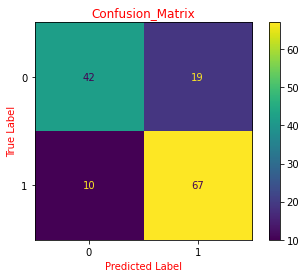

In [55]:
import matplotlib.pyplot as plt
matrix=plot_confusion_matrix(knn,X_test,y_test)
color='red'
matrix.ax_.set_title('Confusion_Matrix',color=color)
plt.xlabel('Predicted Label',color=color)
plt.ylabel('True Label',color=color)
plt.show()

In [63]:
sns.heatmap(cml,annot = True)
plt.show()

In [56]:
#precision score for knn
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,y_pred,average='micro')

0.7898550724637681

In [65]:
#precision score for logistic regression
precision_score(y_test,y_predd,average='micro')

0.8623188405797102

In [57]:
#recall score for knn
recall_score(y_test,y_pred,average='micro')

0.7898550724637681

In [66]:
#recall score for logistic regression
recall_score(y_test,y_predd,average='micro')

0.8623188405797102

In [58]:
#f1 score for knn
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.69      0.74        61\n           1       0.78      0.87      0.82        77\n\n    accuracy                           0.79       138\n   macro avg       0.79      0.78      0.78       138\nweighted avg       0.79      0.79      0.79       138\n'

In [67]:
#f1 score for logistic regression

classification_report(y_test,y_predd)

'              precision    recall  f1-score   support\n\n           0       0.82      0.89      0.85        61\n           1       0.90      0.84      0.87        77\n\n    accuracy                           0.86       138\n   macro avg       0.86      0.86      0.86       138\nweighted avg       0.87      0.86      0.86       138\n'

In [71]:
#f1 score for knn
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='micro')

0.7898550724637681

In [70]:
#f1 score for logistic regression
from sklearn.metrics import f1_score
f1_score(y_test,y_predd,average='micro')

0.8623188405797102

# 8. Making Prediction
- Take any sample record from your training data and make prediction.

In [85]:
knn.predict([[1.0,1.0,0.0,12.0,7.0,1.0,1.0,0.0,0.0,0.256842,0.000000,0.043860,0.014925,0.1010,0.00000]])[0]

C:\Users\Lhamo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0

In [86]:
lg.predict([[0.0,1.0,0.0,10.0,3.0,1.0,1.0,0.0,0.0,0.675489,0.159286,0.106667,0.089552,0.0215,0.00560]])[0]

C:\Users\Lhamo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

# 9. Improve your model

- Use any technique to improve your model.

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs=SelectKBest(score_func=f_classif,k=4)
x_select=fs.fit_transform(alldf,alldf.target)
x_select.shape

C:\Users\Lhamo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


(689, 4)

In [76]:
a=x_select
b=alldf.target
X_train1,X_test1,y_train1,y_test1=train_test_split(a,b,test_size=0.2,random_state=5,stratify=alldf.target)

In [77]:
knn1=KNeighborsClassifier()
knn1.fit(X_train1,y_train1)

KNeighborsClassifier()

In [83]:
lg1 =LogisticRegression()
lg1.fit(X_train1,y_train1)

LogisticRegression()

In [78]:
y_pred1=knn1.predict(X_test1)
y_pred1

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0], dtype=int64)

In [84]:
y_predd1=lg1.predict(X_test1)
y_predd1

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0], dtype=int64)

In [80]:
#training acurracy score
knn1.score(X_train1,y_train1)

0.9963702359346642

In [87]:
lg1.score(X_train1,y_train1)

1.0

In [81]:
#test acurray score
knn1.score(X_test1,y_test1)

1.0

In [88]:
lg1.score(X_train1,y_train1)

1.0

In [89]:
#knn precision
precision_score(y_test1,y_pred1,average='micro')

1.0

In [90]:
#lg precision
precision_score(y_test1,y_predd1,average='micro')

1.0

In [91]:
#recall knn
recall_score(y_test1,y_pred1,average='micro')

1.0

In [92]:
#recall lg
recall_score(y_test1,y_predd1,average='micro')

1.0